# Optimization of modeling parameters

## Load previous data

In [2]:
from pytadbit import Chromosome
crm = Chromosome('chr3', species='Mus musculus', assembly='mm10')
crm.add_experiment('B', 
                   hic_data='results/fragment/mouse_B_both/04_normalizing/20000_raw/raw_chr3-33900000_35400000.mat', 
                   norm_data='results/fragment/mouse_B_both/04_normalizing/20000_norm/norm_chr3-33900000_35400000.mat',
                   resolution=20000,
                   assembly= 'mm10', cycle= 'B', project= '3DAROC', species= 'Mus musculus', enzyme='MboI'
                  )
crm.add_experiment('PSC', 
                   hic_data='results/fragment/mouse_PSC_both/04_normalizing/20000_raw/raw_chr3-33900000_35400000.mat',
                   norm_data='results/fragment/mouse_PSC_both/04_normalizing/20000_norm/norm_chr3-33900000_35400000.mat',
                   resolution=20000,
                  assembly= 'mm10', cycle= 'B', project= '3DAROC', species= 'Mus musculus', enzyme='MboI')

In [3]:
B, PSC = crm.experiments

In [4]:
crm.find_tad(['B','PSC'],n_cpus=8)

In [6]:
B, PSC

(Experiment B (resolution: 20 kb, TADs: 8, Hi-C rows: 75, normalized: visibility),
 Experiment PSC (resolution: 20 kb, TADs: 11, Hi-C rows: 75, normalized: visibility))

Check that the data is there:

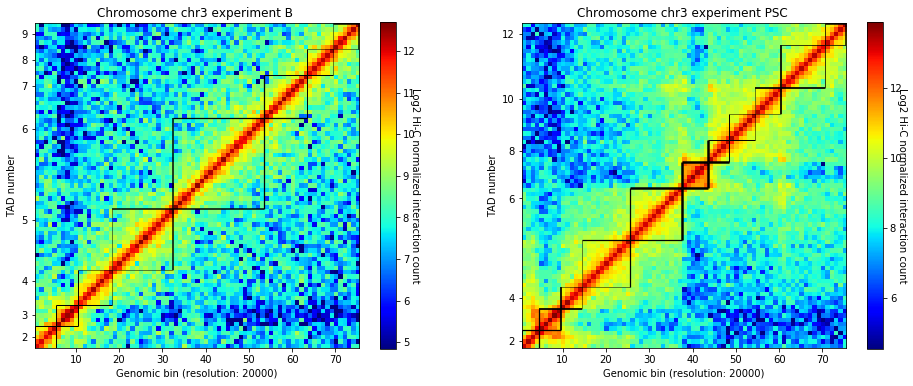

In [5]:
crm.visualize(['B', 'PSC'], normalized=True, paint_tads=True)

## Optimization of parameters

We are going to optimize these parameters for both experiments:
 - maxdit: maximum distance associated to the minimum amount of interactions
 - upfreq: minimum amount of interactions that defines attraction
 - lowfreq: maximum number of interactions that defines repulsion
 - dcutoff: the definition of "contact" in units of bead diameter. Value of 2 means that a contact will occur when 2 beads are closer than 2 times their diameter. This will be used to compare 3D models with Hi-C interaction maps.

In [6]:
opt_B = B.optimal_imp_parameters(start=1, end=75, n_models=40, n_keep=20, n_cpus=8, 
                                   upfreq_range=(0, 0.6, 0.3),
                                   lowfreq_range=(-0.9, 0, 0.3),
                                   maxdist_range=(300, 500, 100), 
                                   dcutoff_range=[1, 2, 3])

Optimizing 75 particles
  num scale	kbending	maxdist	lowfreq	upfreq	dcutoff	correlation


  1   0.01 	0       	300    	-0.9   	0     	3      0.3338
  1   0.01 	0       	300    	-0.9   	0     	2      0.7153
  1   0.01 	0       	300    	-0.9   	0     	1      0.6446
  2   0.01 	0       	300    	-0.9   	0.3   	3      0.3958
  2   0.01 	0       	300    	-0.9   	0.3   	2      0.6837
  2   0.01 	0       	300    	-0.9   	0.3   	1      0.6117
  3   0.01 	0       	300    	-0.9   	0.6   	3      0.5164
  3   0.01 	0       	300    	-0.9   	0.6   	2      0.674
  3   0.01 	0       	300    	-0.9   	0.6   	1      0.6309
  4   0.01 	0       	300    	-0.6   	0     	3      0.3326
  4   0.01 	0       	300    	-0.6   	0     	2      0.7153
  4   0.01 	0       	300    	-0.6   	0     	1      0.6622
  5   0.01 	0       	300    	-0.6   	0.3   	3      0.4093
  5   0.01 	0       	300    	-0.6   	0.3   	2      0.6832
  5   0.01 	0       	300    	-0.6   	0.3   	1      0.649
  6   0.01 	0       	300    	-0.6   	0.6   	3      0.5099
  6   0.01 	0       	300    	-0.6   	0.6   	2      0.6612
  6   0.01 	0   

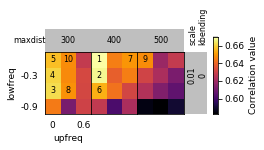

In [7]:
opt_B.plot_2d(show_best=10)

Refine optimization in a small region:

In [8]:
opt_B.run_grid_search(upfreq_range=(0, 0.3, 0.3), lowfreq_range=(-1.2, -0.9, 0.3),
                       maxdist_range=[450,500], 
                       dcutoff_range=[2],
                       n_cpus=8)

Optimizing 75 particles
  num scale	kbending	maxdist	lowfreq	upfreq	dcutoff	correlation


  1   0.01 	0       	450    	-1.2   	0     	2      0.7183
  2   0.01 	0       	450    	-1.2   	0.3   	2      0.7085
  3   0.01 	0       	450    	-0.9   	0     	2      0.7157
  4   0.01 	0       	450    	-0.9   	0.3   	2      0.716
  5   0.01 	0       	500    	-1.2   	0     	2      0.7228
  6   0.01 	0       	500    	-1.2   	0.3   	2      0.7173
  xx   	0.01 	0       	500    	-0.9   	0     	3      	0.5355
  xx   	0.01 	0       	500    	-0.9   	0.3   	3      	0.5541


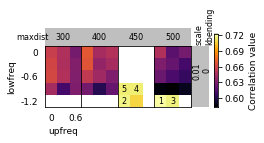

In [9]:
opt_B.plot_2d(show_best=5)

In [13]:
opt_B.run_grid_search(upfreq_range=(0, 0.3, 0.3), lowfreq_range=(-1.9, -0.9, 0.3),
                       maxdist_range=[450,500], 
                       dcutoff_range=[2],
                       n_cpus=8)

Optimizing 75 particles
  num scale	kbending	maxdist	lowfreq	upfreq	dcutoff	correlation


  1   0.01 	0       	450    	-1.9   	0     	2      0.7217
  2   0.01 	0       	450    	-1.9   	0.3   	2      0.7138
  xx   	0.01 	0       	450    	-1.6   	0     	2      	0.729
  xx   	0.01 	0       	450    	-1.6   	0.3   	2      	0.7145
  xx   	0.01 	0       	450    	-1.3   	0     	2      	0.726
  xx   	0.01 	0       	450    	-1.3   	0.3   	2      	0.7155
  xx   	0.01 	0       	450    	-1     	0     	2      	0.7195
  xx   	0.01 	0       	450    	-1     	0.3   	2      	0.7116
  3   0.01 	0       	500    	-1.9   	0     	2      0.7234
  4   0.01 	0       	500    	-1.9   	0.3   	2      0.7158
  xx   	0.01 	0       	500    	-1.6   	0     	2      	0.7245
  xx   	0.01 	0       	500    	-1.6   	0.3   	2      	0.7181
  xx   	0.01 	0       	500    	-1.3   	0     	2      	0.723
  xx   	0.01 	0       	500    	-1.3   	0.3   	2      	0.7213
  xx   	0.01 	0       	500    	-1     	0     	2      	0.7151
  xx   	0.01 	0       	500    	-1     	0.3   	2      	0.7166


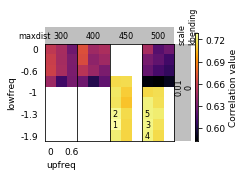

In [14]:
opt_B.plot_2d(show_best=5)

In [15]:
opt_B.get_best_parameters_dict()

{'dcutoff': 2.0,
 'kbending': 0.0,
 'kforce': 5,
 'lowfreq': -1.6,
 'maxdist': 450.0,
 'reference': '',
 'scale': 0.01,
 'upfreq': 0.0}

For the other replicate, we can reduce the space of search:

In [16]:
opt_PSC = PSC.optimal_imp_parameters(start=1, end=75, n_models=40, n_keep=20, n_cpus=8, 
                                     upfreq_range=(0, 0.3, 0.3), 
                                     lowfreq_range=(-1.6, -0.9, 0.3),
                                     maxdist_range=[450,500], 
                                     dcutoff_range=[2])

Optimizing 75 particles
  num scale	kbending	maxdist	lowfreq	upfreq	dcutoff	correlation


  1   0.01 	0       	450    	-1.6   	0     	2      0.868
  2   0.01 	0       	450    	-1.6   	0.3   	2      0.8576
  3   0.01 	0       	450    	-1.3   	0     	2      0.8722
  4   0.01 	0       	450    	-1.3   	0.3   	2      0.8638
  5   0.01 	0       	450    	-1     	0     	2      0.8712
  6   0.01 	0       	450    	-1     	0.3   	2      0.8673
  7   0.01 	0       	500    	-1.6   	0     	2      0.8733
  8   0.01 	0       	500    	-1.6   	0.3   	2      0.8655
  9   0.01 	0       	500    	-1.3   	0     	2      0.8753
  10  0.01 	0       	500    	-1.3   	0.3   	2      0.8692
  11  0.01 	0       	500    	-1     	0     	2      0.8767
  12  0.01 	0       	500    	-1     	0.3   	2      0.8726


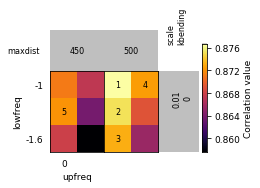

In [17]:
opt_PSC.plot_2d(show_best=5)

In [20]:
opt_PSC.get_best_parameters_dict()

{'dcutoff': 2.0,
 'kbending': 0.0,
 'kforce': 5,
 'lowfreq': -1.0,
 'maxdist': 500.0,
 'reference': '',
 'scale': 0.01,
 'upfreq': 0.0}

In [21]:
crm.save_chromosome('results/fragment/chr3-33900000_35400000_20k.tdb')